In [289]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from pandas import DataFrame
%matplotlib inline

def distancia(x0, y0, x1, y1):
    return np.sqrt((x0-x1)**2 + (y0 + y1)**2)
def elevaQuadrado(D):
    n = len(D)
    D2 = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            D2[i,j] = D[i,j]*D[i,j]
    return D2
def desenhaVizinhos3D(M):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    n = len(M)
    cor = ['red', 'blue', 'green', 'black', 'pink', 'orange', 'yellow', 'brown', 'gray', 'cyan']
    cont = 0
    for i in range(n):
        xs = M[i][0]
        ys = M[i][2]
        zs = M[i][3]
        ax.scatter(xs, ys, zs, color = cor[cont], marker='o')
        cont = cont + 1
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()
def desenhaVizinhos(M):
    n = len(M)
    x_min = np.amin(M)*1.2
    x_max = np.amax(M)*1.2
    cor = ['red', 'blue', 'green', 'black', 'pink', 'orange', 'yellow', 'brown', 'gray', 'cyan']
    cont = 0
    '''for i in range(1,n):
        for j in range(i):
            print M[i][j]
            plt.scatter(M[i][j], M[i][j], color = cor[cont])
            cont = cont + 1
        print'''
    for i in range(n):
        plt.scatter(M[i,0], M[i,1],color = cor[cont])
        #plt.plot(M[i][0], M[i][1], 'k-', lw=2)
        cont = cont + 1
    plt.xlim(x_min,x_max)
    plt.ylim(x_min,x_max)
    plt.legend(('A', 'B', 'C', 'D'),
           scatterpoints=1,
           loc='lower left',
           ncol=4,
           fontsize=8)
    plt.grid()
    plt.show()
    
def toDataFrame(M, name):
    df = pd.DataFrame(M, columns = name, index = name)
    return df
def mds(D):                                                                      
    n = len(D)                                                                      
    H = np.eye(n) - np.ones((n, n))*0.25

    # D[i][j] = D[i][j]^2
    D2 = elevaQuadrado(D)
    
    B = -H.dot(D2).dot(H)/2
 
    # Diagonaliza                                                                            
    evals, evecs = np.linalg.eig(B)
    
    # Ordeno os autovalores e autovetores                                                  
    idx   = np.argsort(evals)[::-1]
    evals = evals[idx]
    evecs = evecs[:,idx]
 
    # Pego os maiores autovalores positivos
    w, = np.where(evals > 0)
    
    L  = np.diag(np.sqrt(evals[w]))
    
    V  = evecs[:,w]

    Y  = V.dot(L)
    
    return Y, evals

In [290]:
D = np.matrix([[0., 93., 82., 133.],[93., 0., 52., 60.],[82., 52., 0., 111.], [133., 60., 111., 0.]])
D

matrix([[   0.,   93.,   82.,  133.],
        [  93.,    0.,   52.,   60.],
        [  82.,   52.,    0.,  111.],
        [ 133.,   60.,  111.,    0.]])

[[   0.   93.   82.  133.]
 [  93.    0.   52.   60.]
 [  82.   52.    0.  111.]
 [ 133.   60.  111.    0.]]
[[ -6.28310778e+01   3.29744814e+01   4.16349340e-02  -1.36522991e-07]
 [  1.84028890e+01  -1.20269692e+01  -4.94956435e+00  -1.36522991e-07]
 [ -2.49601833e+01  -3.97109096e+01   2.61637266e+00  -1.36522991e-07]
 [  6.93883721e+01   1.87633975e+01   2.29155675e+00  -1.36522991e-07]]


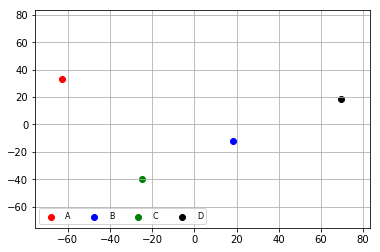

,A,B,C,D
A,-62.831078,32.974481,0.041635,-1.365230e-07
B,18.402889,-12.026969,-4.949564,-1.365230e-07
C,-24.960183,-39.710910,2.616373,-1.365230e-07
D,69.388372,18.763397,2.291557,-1.365230e-07


In [291]:
Y, autovetores = mds(D)
print D
print Y
desenhaVizinhos(Y)

#O plot3D traz alguma infomacao util?
#desenhaVizinhos3D(Y)
name = ['A', 'B', 'C', 'D']
dfY = toDataFrame(Y, name)
dfY

In [284]:
dfD = toDataFrame(D, name)
dfD

,A,B,C,D
A,0.0,93.0,82.0,133.0
B,93.0,0.0,52.0,60.0
C,82.0,52.0,0.0,111.0
D,133.0,60.0,111.0,0.0



Multi-dimensional scaling
  
An illustration of the metric and non-metric MDS on generated noisy data.
  
The reconstructed points using the metric MDS and non metric MDS are slightly
shifted to avoid overlapping.



/Users/LuisClaudio/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:69: RuntimeWarning: divide by zero encountered in true_divide


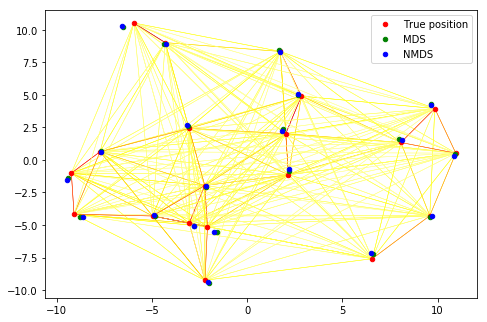

In [285]:
"""
=========================
Multi-dimensional scaling
=========================
  
An illustration of the metric and non-metric MDS on generated noisy data.
  
The reconstructed points using the metric MDS and non metric MDS are slightly
shifted to avoid overlapping.
"""
  
# Author: Nelle Varoquaux <nelle.varoquaux@gmail.com>
# Licence: BSD
  
print(__doc__)
import numpy as np
  
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
  
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
  
n_samples = 20
seed = np.random.RandomState(seed=3)
X_true = seed.randint(0, 20, 2 * n_samples).astype(np.float)
X_true = X_true.reshape((n_samples, 2))
# Center the data
X_true -= X_true.mean()
  
similarities = euclidean_distances(X_true)
  
# Add noise to the similarities
noise = np.random.rand(n_samples, n_samples)
noise = noise + noise.T
noise[np.arange(noise.shape[0]), np.arange(noise.shape[0])] = 0
similarities += noise
  
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(similarities).embedding_
  
nmds = manifold.MDS(n_components=2, metric=False, max_iter=3000, eps=1e-12,
                    dissimilarity="precomputed", random_state=seed, n_jobs=1,
                    n_init=1)
npos = nmds.fit_transform(similarities, init=pos)
  
# Rescale the data
pos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((pos ** 2).sum())
npos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((npos ** 2).sum())
  
# Rotate the data
clf = PCA(n_components=2)
X_true = clf.fit_transform(X_true)
  
pos = clf.fit_transform(pos)
  
npos = clf.fit_transform(npos)
  
fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])
  
plt.scatter(X_true[:, 0], X_true[:, 1], c='r', s=20)
plt.scatter(pos[:, 0], pos[:, 1], s=20, c='g')
plt.scatter(npos[:, 0], npos[:, 1], s=20, c='b')
plt.legend(('True position', 'MDS', 'NMDS'), loc='best')
  
similarities = similarities.max() / similarities * 100
similarities[np.isinf(similarities)] = 0
  
# Plot the edges
start_idx, end_idx = np.where(pos)
#a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [[X_true[i, :], X_true[j, :]]
            for i in range(len(pos)) for j in range(len(pos))]
values = np.abs(similarities)
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.hot_r,
                    norm=plt.Normalize(0, values.max()))
lc.set_array(similarities.flatten())
lc.set_linewidths(0.5 * np.ones(len(segments)))
ax.add_collection(lc)
  
plt.show()
  


 Comparison of Manifold Learning methods
  
An illustration of dimensionality reduction on the S-curve dataset
with various manifold learning methods.
  
For a discussion and comparison of these algorithms, see the
:ref:`manifold module page <manifold>`
  
For a similar example, where the methods are applied to a
sphere dataset, see :ref:`example_manifold_plot_manifold_sphere.py`
  
Note that the purpose of the MDS is to find a low-dimensional
representation of the data (here 2D) in which the distances respect well
the distances in the original high-dimensional space, unlike other
manifold-learning algorithms, it does not seeks an isotropic
representation of the data in the low-dimensional space.

standard: 0.23 sec
ltsa: 0.28 sec
hessian: 0.57 sec
modified: 0.32 sec
Isomap: 0.54 sec
MDS: 3.2 sec
SpectralEmbedding: 0.19 sec


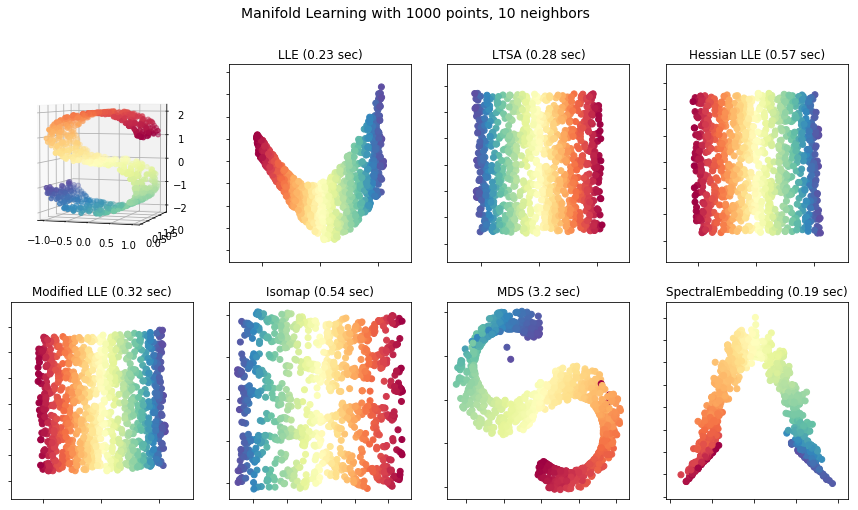

In [286]:
"""
=========================================
 Comparison of Manifold Learning methods
=========================================
  
An illustration of dimensionality reduction on the S-curve dataset
with various manifold learning methods.
  
For a discussion and comparison of these algorithms, see the
:ref:`manifold module page <manifold>`
  
For a similar example, where the methods are applied to a
sphere dataset, see :ref:`example_manifold_plot_manifold_sphere.py`
  
Note that the purpose of the MDS is to find a low-dimensional
representation of the data (here 2D) in which the distances respect well
the distances in the original high-dimensional space, unlike other
manifold-learning algorithms, it does not seeks an isotropic
representation of the data in the low-dimensional space.
"""
  
# Author: Jake Vanderplas -- <vanderplas@astro.washington.edu>
  
print(__doc__)
  
from time import time
  
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
  
from sklearn import manifold, datasets
  
# Next line to silence pyflakes. This import is needed.
Axes3D
  
n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2
  
fig = pl.figure(figsize=(15, 8))
pl.suptitle("Manifold Learning with %i points, %i neighbors"
            % (1000, n_neighbors), fontsize=14)
  
try:
    # compatibility matplotlib < 1.0
    ax = fig.add_subplot(241, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=pl.cm.Spectral)
    ax.view_init(4, -72)
except:
    ax = fig.add_subplot(241, projection='3d')
    pl.scatter(X[:, 0], X[:, 2], c=color, cmap=pl.cm.Spectral)
  
methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']
  
for i, method in enumerate(methods):
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                        eigen_solver='auto',
                                        method=method).fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))
  
    ax = fig.add_subplot(242 + i)
    pl.scatter(Y[:, 0], Y[:, 1], c=color, cmap=pl.cm.Spectral)
    pl.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    pl.axis('tight')
  
t0 = time()
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(246)
pl.scatter(Y[:, 0], Y[:, 1], c=color, cmap=pl.cm.Spectral)
pl.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
pl.axis('tight')
  
  
t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(X)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(247)
pl.scatter(Y[:, 0], Y[:, 1], c=color, cmap=pl.cm.Spectral)
pl.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
pl.axis('tight')
  
  
t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Y = se.fit_transform(X)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(248)
pl.scatter(Y[:, 0], Y[:, 1], c=color, cmap=pl.cm.Spectral)
pl.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
pl.axis('tight')
  
pl.show()
  